A visual inspection of the tweets dataset using the Naïve Bayes features.

In [1]:
# import dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
files.upload()

Saving utils.py to utils.py


{'utils.py': b'# -*- coding: utf-8 -*-\n"""utils.ipynb\n\nAutomatically generated by Colaboratory.\n\nOriginal file is located at\n    https://colab.research.google.com/drive/14Fp_ARD8EDcQ4_AtdG3jCXoc9RODzHTV\n"""\n"""Import Dependencies"""\n\nimport numpy as np\nimport string\nimport re\n\nimport nltk\nfrom nltk.corpus import stopwords\nfrom nltk.stem import PorterStemmer\nfrom nltk.tokenize import TweetTokenizer\n\nimport matplotlib.pyplot as plt\nfrom matplotlib.patches import Ellipse\nimport matplotlib.transforms as transforms\n\n"""Preprocessing function"""\n\ndef process_tweet(tweet):\n  """\n  Input: a string\n  output: list of words\n  """\n\n  stemmer = PorterStemmer()\n  tokenizer = TweetTokenizer(preserve_case = False, reduce_len = True, strip_handles = True)\n  stopword_english = stopwords.words(\'english\')\n\n  # remove retweet sign, stock tickers, urls, #\n\n  tweet = re.sub(r\'^RT[\\s]+\', \'\', tweet)\n  tweet = re.sub(r\'^\\$\\w*\', \'\', tweet)\n  tweet = re.sub(r\'h

In [3]:
from utils import confidence_ellipse

In [4]:
# read data

data = pd.read_csv('/content/bayes_features.csv')
data.head(10)

,positive,negative,sentiment
0,-45.763393,-63.351354,1.0
1,-105.491568,-114.204862,1.0
2,-57.028078,-67.216467,1.0
3,-10.055885,-18.589057,1.0
4,-125.749270,-138.334845,1.0
5,-25.168635,-35.703266,1.0
6,-73.594662,-90.405361,1.0
7,-105.436044,-114.329517,1.0
8,-36.854375,-43.717174,1.0
9,-117.905062,-129.445782,1.0


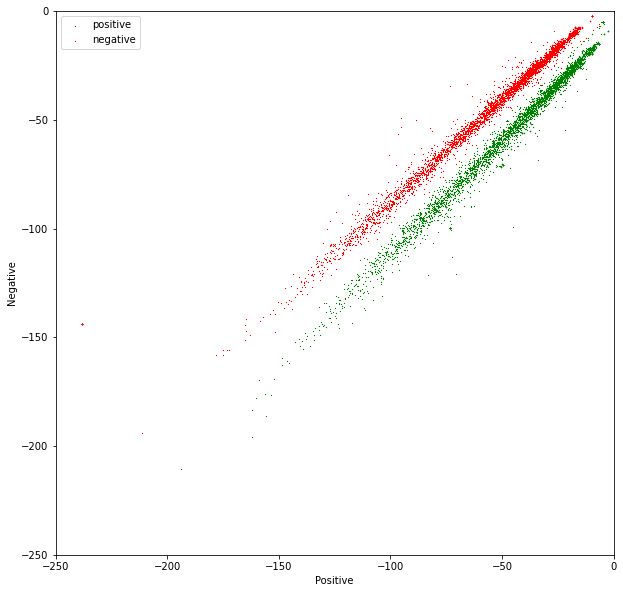

In [5]:
# plot the data points

plt.figure(figsize=(10,10))

colors = ['red', 'green']
sentiments = ['negative', 'positive'] 

index = data.index

# Color base on sentiment
for sentiment in data.sentiment.unique():
    ix = index[data.sentiment == sentiment]
    plt.scatter(data.iloc[ix].positive, data.iloc[ix].negative, c=colors[int(sentiment)], s=0.1, marker='*', label=sentiments[int(sentiment)])

plt.legend(loc='best')    
    
# Custom limits for this chart
plt.xlim(-250,0)
plt.ylim(-250,0)

plt.xlabel("Positive") # x-axis label
plt.ylabel("Negative") # y-axis label
plt.show()

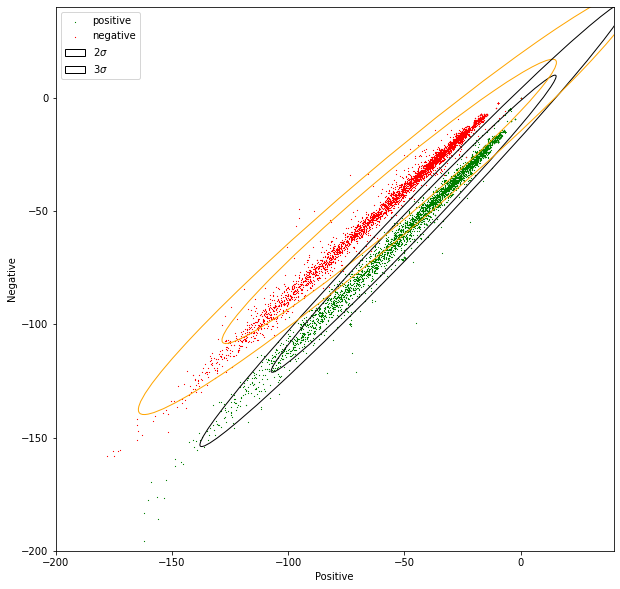

In [8]:
# Using Confidence Ellipses to interpret Naïve Bayes

# First plot the data points as before
fig, ax = plt.subplots(figsize = (10, 10))

colors = ['red', 'green']
sentiments = ['negative', 'positive'] 

index = data.index

# Color base on sentiment
for sentiment in data.sentiment.unique():
    ix = index[data.sentiment == sentiment]
    ax.scatter(data.iloc[ix].positive, data.iloc[ix].negative, c=colors[int(sentiment)], s=0.1, marker='*', label=sentiments[int(sentiment)])
  
# Custom limits for this chart
plt.xlim(-200,40)  
plt.ylim(-200,40)

plt.xlabel("Positive") # x-axis label
plt.ylabel("Negative") # y-axis label

# Separate the positive and negative samples

data_pos = data[data.sentiment == 1] # Filter only the positive samples
data_neg = data[data.sentiment == 0] # Filter only the negative samples


# Print confidence ellipses of 2 std

confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=2, edgecolor='black', label=r'$2\sigma$' )
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=2, edgecolor='orange')


# Print confidence ellipses of 3 std

confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=3, edgecolor='black', label=r'$3\sigma$' )
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=3, edgecolor='orange')

plt.legend(loc='best') 
plt.show()

Modify the features of the samples with positive sentiment (1), in a way that the two distributions overlap. In this case, the Naïve Bayes method will produce a lower accuracy than with the original data.

In [9]:
data2 = data.copy() 

# The following 2 lines only modify the entries in the data frame where sentiment == 1
data2.negative[data.sentiment == 1] =  data2.negative * 1.5 + 50 
data2.positive[data.sentiment == 1] =  data2.positive / 1.5 - 50 

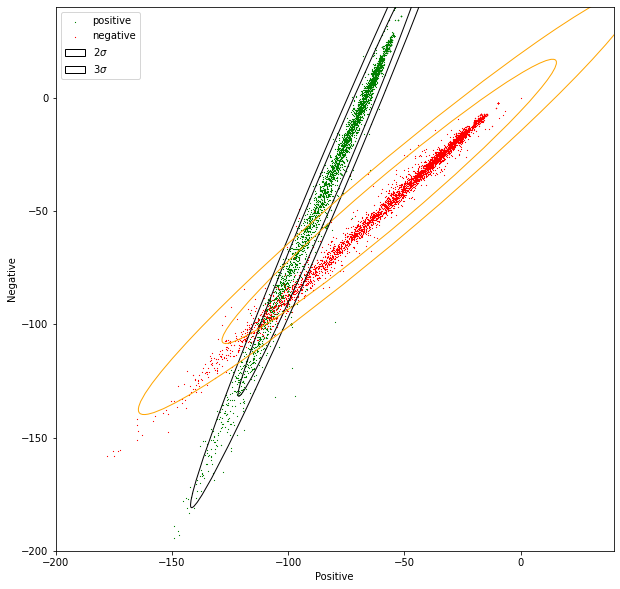

In [11]:
# Plot again

# First plot the data points as before
fig, ax = plt.subplots(figsize = (10, 10))

colors = ['red', 'green']
sentiments = ['negative', 'positive'] 

index = data2.index

# Color base on sentiment
for sentiment in data2.sentiment.unique():
    ix = index[data2.sentiment == sentiment]
    ax.scatter(data2.iloc[ix].positive, data2.iloc[ix].negative, c=colors[int(sentiment)], s=0.1, marker='*', label=sentiments[int(sentiment)])
  
# Custom limits for this chart
plt.xlim(-200,40)  
plt.ylim(-200,40)

plt.xlabel("Positive") # x-axis label
plt.ylabel("Negative") # y-axis label

# Separate the positive and negative samples

data_pos = data2[data2.sentiment == 1] # Filter only the positive samples
data_neg = data2[data2.sentiment == 0] # Filter only the negative samples


# Print confidence ellipses of 2 std

confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=2, edgecolor='black', label=r'$2\sigma$' )
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=2, edgecolor='orange')


# Print confidence ellipses of 3 std

confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=3, edgecolor='black', label=r'$3\sigma$' )
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=3, edgecolor='orange')

plt.legend(loc='best') 
plt.show()